In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('glass.csv')

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

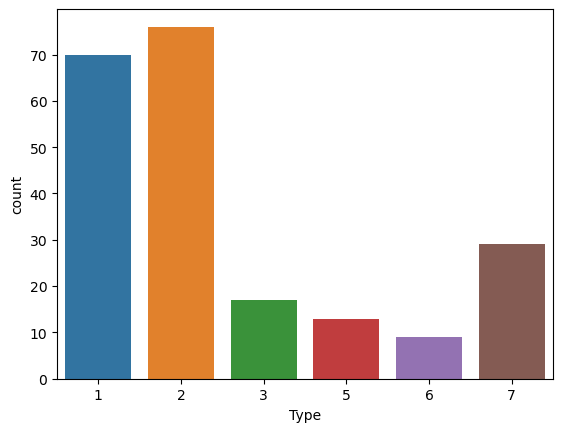

In [7]:
sns.countplot(x=df['Type'])

<AxesSubplot:>

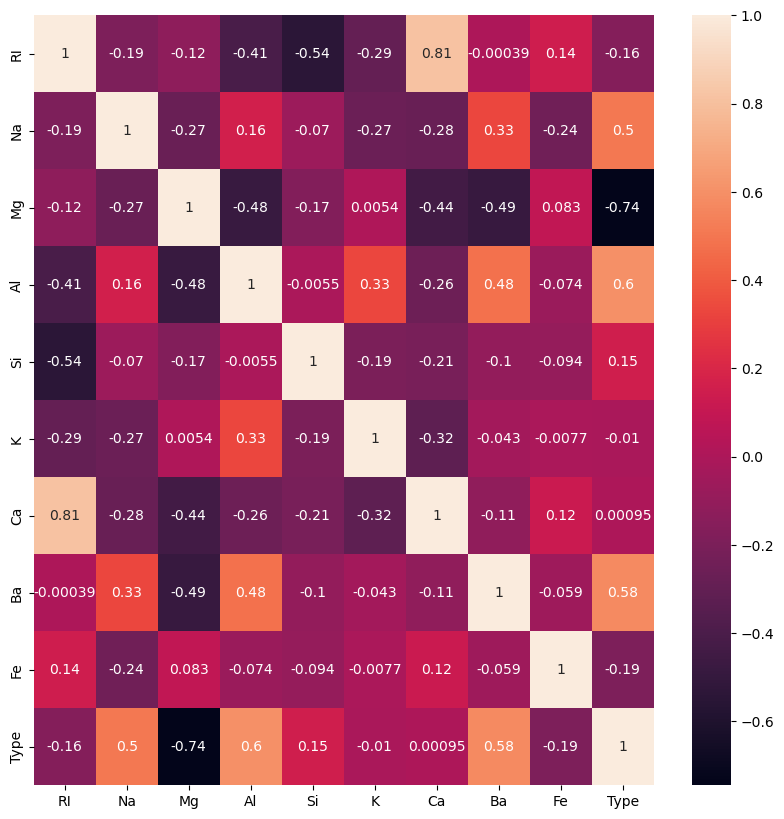

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [10]:
x=df.drop(columns=['Type'])
y=df['Type']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)

In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
model=GaussianNB()

In [15]:
model.fit(x_train,y_train)

GaussianNB()

In [16]:
model.score(x_train,y_train)

0.569060773480663

In [17]:
predicted=model.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [19]:
accuracy_score(y_test,predicted)

0.48484848484848486

In [20]:
confusion_matrix(y_test,predicted)

array([[8, 2, 1, 0, 0, 0],
       [8, 2, 0, 0, 0, 0],
       [2, 0, 1, 0, 1, 0],
       [0, 2, 0, 0, 0, 1],
       [0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 3]], dtype=int64)

<AxesSubplot:>

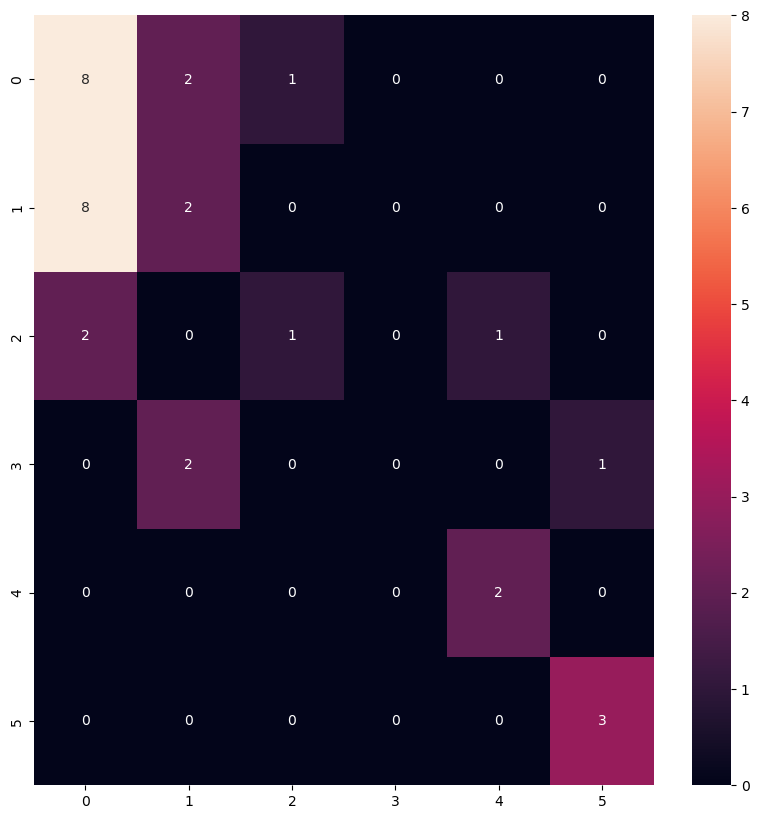

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,predicted),annot=True)

In [22]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           1       0.44      0.73      0.55        11
           2       0.33      0.20      0.25        10
           3       0.50      0.25      0.33         4
           5       0.00      0.00      0.00         3
           6       0.67      1.00      0.80         2
           7       0.75      1.00      0.86         3

    accuracy                           0.48        33
   macro avg       0.45      0.53      0.47        33
weighted avg       0.42      0.48      0.43        33



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
